# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories;
from make_json import parameter_names;

Neighboring files:
Removed JSON file: BG_INTACT_DAYS/parameters_40.json
Removed JSON file: BG_INTACT_DAYS/parameters_20.json
Removed JSON file: BG_INTACT_DAYS/parameters_60.json
Directory: BG_INTACT_DAYS
Modified parameter 'params/BG_INTACT_DAYS' to 20 and saved to BG_INTACT_DAYS/parameters_20.json
Modified parameter 'params/BG_INTACT_DAYS' to 40 and saved to BG_INTACT_DAYS/parameters_40.json
Modified parameter 'params/BG_INTACT_DAYS' to 60 and saved to BG_INTACT_DAYS/parameters_60.json


In [10]:
wanted_directories = ["BG_INTACT_DAYS"] #["BG_NOISE", "LEARNING_RATE_RL", "REWARD_WINDOW", "LEARNING_RATE_HL","TARGET_WIDTH","ANNEALING", "JUMP_MID", "JUMP_SLOPE", "JUMP_FACTOR", "RA_SIG_SLOPE", "balance_factor","RA_NOISE"]#["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]                                       

In [11]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_cut = {}
data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_cut"):   
            filepath = os.path.join(directory, filename)
            data_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_nocut"):
            filepath = os.path.join(directory, filename)
            data_no_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_cut.keys())
print(data_no_cut.keys())
print(parameter_values)

BG_INTACT_DAYS
dict_keys(['BG_INTACT_DAYS'])
dict_keys(['BG_INTACT_DAYS'])
{'BG_INTACT_DAYS': array([40., 20., 60.])}


In [12]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [13]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

/tmp/ipykernel_14063/1874706943.py:47: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.9`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(
/tmp/ipykernel_14063/1874706943.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x=labels, y=data, hue=group, dodge=True, color='black', alpha=0.5, size=3, jitter=True)


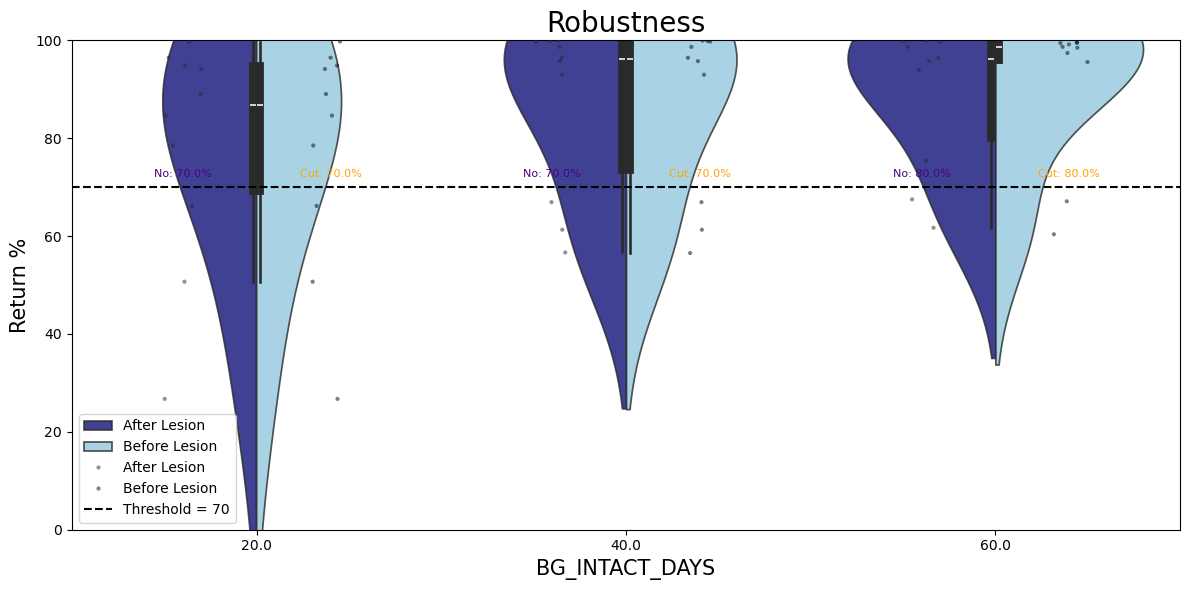

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]

        parameter_values_sorted = sorted(parameter_values[directory])
        sorted_indices = np.argsort(parameter_values[directory])
        
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)

        # Calculate percentage above threshold
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]

        # Prepare data for seaborn
        data = []
        labels = []
        group = []

        for i in range(n_values):
            # Append "after lesion" data
            data.extend(returns_cut[:, i])
            labels.extend([parameter_values_sorted[i]] * returns_cut.shape[0])
            group.extend(['After Lesion'] * returns_cut.shape[0])

            # Append "before lesion" data
            data.extend(returns_no_cut[:, i])
            labels.extend([parameter_values_sorted[i]] * returns_no_cut.shape[0])
            group.extend(['Before Lesion'] * returns_no_cut.shape[0])

        # Plot violin plot
        plt.figure(figsize=(12, 6))
        ax = sns.violinplot(
            x=labels, y=data, hue=group, split=True, bw=0.9,
            palette={'Before Lesion': 'skyblue', 'After Lesion': 'darkblue'}, alpha=0.8
        )
        sns.stripplot(x=labels, y=data, hue=group, dodge=True, color='black', alpha=0.5, size=3, jitter=True)   

        # Annotate above-threshold percentages
        for i, val in enumerate(parameter_values_sorted):
            x_offset = 0.2  # adjust x position for spacing
            ax.text(i + x_offset, 72, f"Cut: {100 * above_threshold_cut[i]:.1f}%", color='orange', ha='center', fontsize=8)
            ax.text(i - x_offset, 72, f"No: {100 * above_threshold_no_cut[i]:.1f}%", color='indigo', ha='center', fontsize=8)
        plt.title(f'Robustness', fontsize=20)
        plt.axhline(70, color='black', linestyle='--', label='Threshold = 70')
        plt.xlabel(param, fontsize = 15)
        plt.ylabel('Return %', fontsize = 15)
        plt.ylim(0, 100)
        plt.legend()
        plt.tight_layout()
        plt.show()


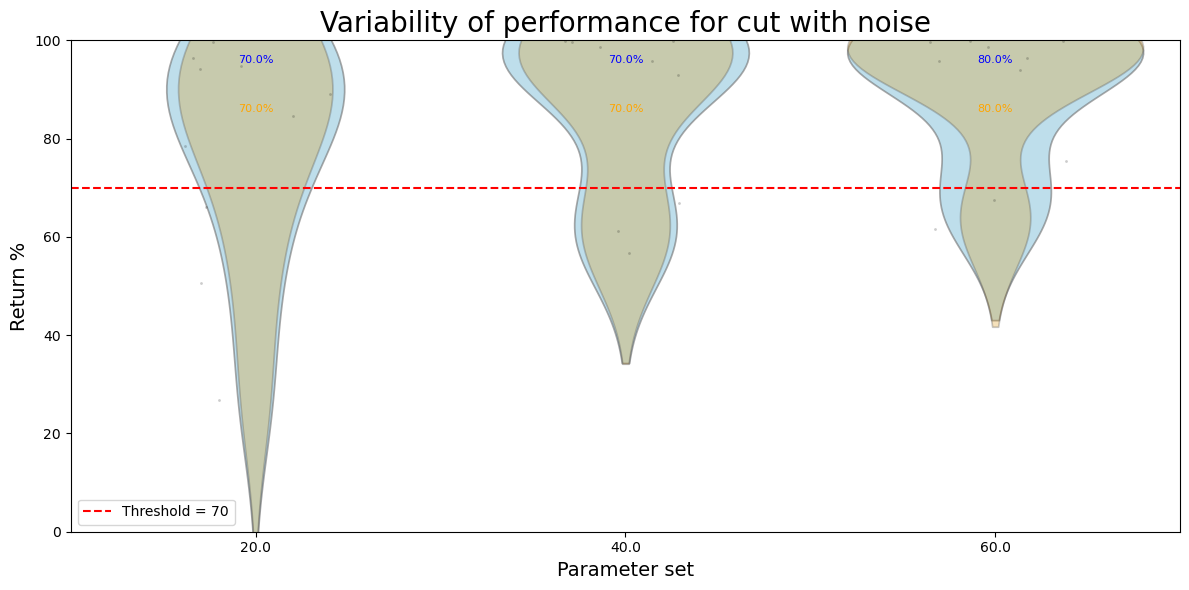

In [18]:
def plot_results_violin(returns_cut, returns_no_cut, params, label):
    returns_cut = np.array(returns_cut) * 100
    returns_no_cut = np.array(returns_no_cut) * 100 
    sorted_params = sorted(params)
    sorted_indices = np.argsort(params)
    
    returns_cut = returns_cut[:, sorted_indices]
    returns_no_cut = returns_no_cut[:, sorted_indices]
    sorted_params = np.array(params)[sorted_indices]

    n_values = len(sorted_params)
    above_threshold = np.zeros(n_values)
    above_threshold2 = np.zeros(n_values)
    
    # Flatten data for seaborn
    data = []
    data2 = []
    labels = []

    for i in range(n_values):
        col = returns_cut[:, i]
        col2 = returns_no_cut[:, i]
        above_threshold[i] = np.sum(col > 70) / len(col)
        above_threshold2[i] = np.sum(col2 > 70) / len(col2) 

        data.extend(col)
        data2.extend(col2)
        labels.extend([sorted_params[i]] * len(col))

    # Plotting
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x=labels, y=data, inner=None, color='skyblue', alpha=0.6)
    ax = sns.violinplot(x=labels, y=data2, inner=None, color='orange', alpha=0.3)

    sns.stripplot(x=labels, y=data, size=2, color='black', alpha=0.2, jitter=0.2)

    # Add threshold line and annotations
    for i in range(n_values):
        plt.text(i, 95, f"{100 * above_threshold[i]:.1f}%", ha='center', va='bottom', fontsize=8, color='blue')
        plt.text(i, 85, f"{100 * above_threshold2[i]:.1f}%", ha='center', va='bottom', fontsize=8, color='orange')
    plt.axhline(70, color='red', linestyle='--', label='Threshold = 70')
    plt.xlabel('Parameter set', fontsize=14)
    plt.ylabel('Return %', fontsize=14)
    plt.ylim(0, 100)
    plt.title(f"Variability of performance for {label} with noise", fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_results_violin(data_cut['BG_INTACT_DAYS'],data_no_cut['BG_INTACT_DAYS'], parameter_values['BG_INTACT_DAYS'], "cut")
# plot_results_violin(data_no_cut['BG_NOISE'], parameter_values['BG_NOISE'], "no cut")

[0.05, 0.075, 0.1, 0.15, 0.2]


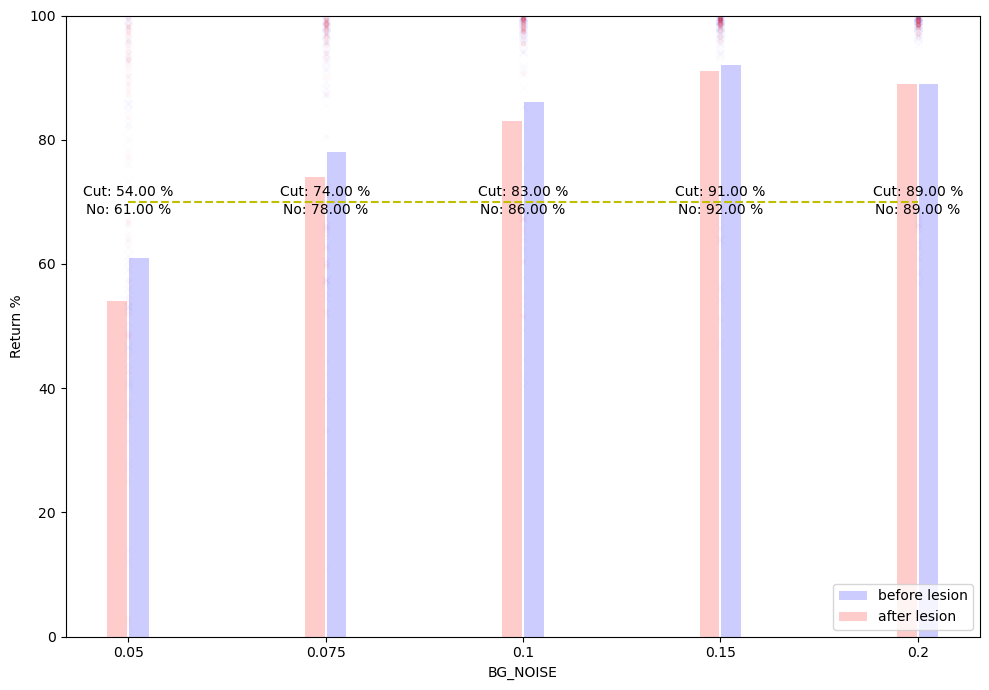

In [ ]:
# def plot_returns(data, key):
width = 0.055
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(10,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(np.arange(n_values)+width, 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.1, color='b')
        plt.bar(np.arange(n_values)-width, 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.1, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        # plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.tight_layout()
        plt.legend()
        plt.show()

[0.05, 0.075, 0.1, 0.15, 0.2]


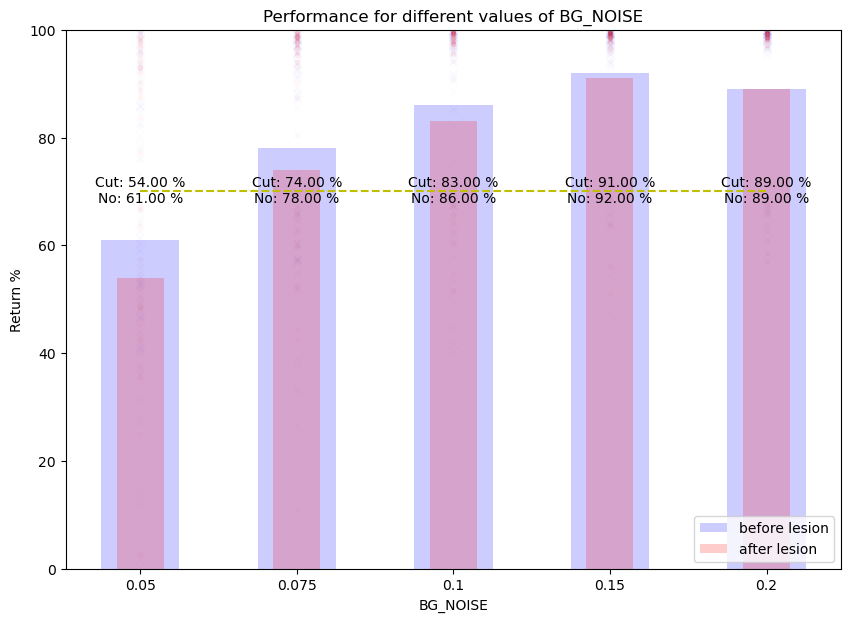

In [ ]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(10,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.5, color='b')
        plt.bar(range(n_values), 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.3, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()

Base model parameters
1. `JUMP_MID` = 0.6
2. `JUMP_SLOPE` >= 50 /* higher jump slope causes the night jump to pause when above threshold. Leading to stable model. */
3. `BG_NOISE` anything between 0.05 - 0.15 
4. `REWARD_WINDOW` = 5
5. `LEARNING_RATE_RL` = 0.2 best; 0.1 okay